# CPSC 4970 AI + ML: Module 2

In [128]:
import sklearn.datasets
from IPython.core.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

plt.style.use('dark_background')

## Exploratory Data Analysis -- skipping some steps

In [129]:
db = sklearn.datasets.load_diabetes(as_frame=True)['frame']
print(db.info())
train, test = train_test_split(db, test_size=0.33)
# X = everything but least column
X_train = train.iloc[:, :-1]
X_test = test.iloc[:, :-1]
# y = target column
y_train = train['target']
y_test = test['target']

display(X_train.head())
display(y_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
331,0.081666,0.050680,-0.025607,-0.036656,-0.070367,-0.046407,-0.039719,-0.002592,-0.041180,-0.005220
416,-0.027310,-0.044642,0.080019,0.098763,-0.002945,0.018101,-0.017629,0.003312,-0.029528,0.036201
208,0.030811,-0.044642,0.040140,0.076958,0.017694,0.037830,-0.028674,0.034309,-0.001499,0.119043
214,0.030811,-0.044642,-0.033151,-0.022885,-0.046975,-0.081167,0.103865,-0.076395,-0.039810,-0.054925
60,-0.070900,-0.044642,-0.004050,-0.040099,-0.066239,-0.078662,0.052322,-0.076395,-0.051401,-0.034215


331    199.0
416    257.0
208    155.0
214     65.0
60      61.0
Name: target, dtype: float64

## Create linear regression model

Training MSE:  2775.242014649815
Training R2:  0.5163570908121631
[  26.34058493 -256.14864831  426.68510628  328.07362145 -641.74149826
  343.14649011   43.59986076  226.30826786  641.47266307  135.0913356 ]


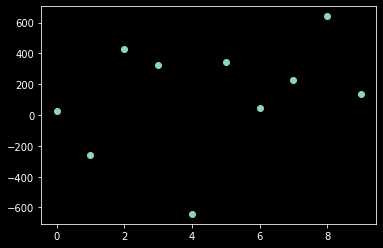

In [130]:
lr = LinearRegression().fit(X_train, y_train)
train_predicted = lr.predict(X_train)
print("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train, y_train))
print(lr.coef_)
plt.scatter(range(len(lr.coef_)), lr.coef_)

## Create quadratic model

(65,)
Training MSE:  2135.5416025441386
Training R2:  0.6278380235330834


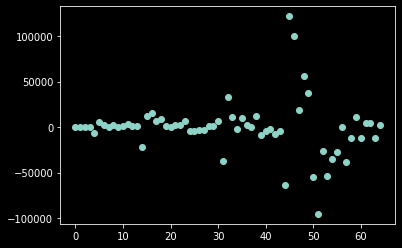

In [131]:
polynomial = PolynomialFeatures(degree=2, include_bias=False)
polynomial.fit(X_train)
X_train_poly = polynomial.transform(X_train)
lr = LinearRegression().fit(X_train_poly, y_train)
train_predicted = lr.predict(X_train_poly)
print(lr.coef_.shape)
plt.scatter(range(len(lr.coef_)), lr.coef_)
print("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train_poly, y_train))